In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('data/Mountains.csv')


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 11 columns):
Rank                         118 non-null int64
Mountain                     118 non-null object
Height (m)                   118 non-null int64
Height (ft)                  118 non-null int64
Prominence (m)               118 non-null int64
Range                        118 non-null object
Coordinates                  118 non-null object
Parent mountain              117 non-null object
First ascent                 118 non-null object
Ascents bef. 2004            116 non-null object
Failed attempts bef. 2004    115 non-null float64
dtypes: float64(1), int64(4), object(6)
memory usage: 10.2+ KB


,Rank,Height (m),Height (ft),Prominence (m),Failed attempts bef. 2004
count,118.000000,118.000000,118.000000,118.000000,115.000000
mean,59.500000,7578.042373,24862.364407,1671.567797,8.400000
std,34.207699,341.471211,1120.311905,1234.813419,15.782958
min,1.000000,7200.000000,23622.000000,217.000000,0.000000
25%,30.250000,7316.500000,24004.000000,712.750000,1.000000
50%,59.500000,7472.500000,24516.500000,1332.500000,3.000000
75%,88.750000,7775.500000,25509.750000,2297.250000,11.000000
max,118.000000,8848.000000,29029.000000,8848.000000,121.000000


In [4]:
df.set_index('Mountain', inplace=True)

df.drop(['Rank','Height (ft)','Coordinates', 'Parent mountain'], axis=1, inplace=True)

In [6]:
df.head(5)

,Height (m),Prominence (m),Range,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
Mountain,,,,,,
Mount Everest / Sagarmatha / Chomolungma,8848,8848,Mahalangur Himalaya,1953,>>145,121.0
K2 / Qogir / Godwin Austen,8611,4017,Baltoro Karakoram,1954,45,44.0
Kangchenjunga,8586,3922,Kangchenjunga Himalaya,1955,38,24.0
Lhotse,8516,610,Mahalangur Himalaya,1956,26,26.0
Makalu,8485,2386,Mahalangur Himalaya,1955,45,52.0


In [7]:
df.drop(['Mount Everest / Sagarmatha / Chomolungma', 'Muztagh Ata'], axis=0, inplace=True)
df.head()

,Height (m),Prominence (m),Range,First ascent,Ascents bef. 2004,Failed attempts bef. 2004
Mountain,,,,,,
K2 / Qogir / Godwin Austen,8611,4017,Baltoro Karakoram,1954,45,44.0
Kangchenjunga,8586,3922,Kangchenjunga Himalaya,1955,38,24.0
Lhotse,8516,610,Mahalangur Himalaya,1956,26,26.0
Makalu,8485,2386,Mahalangur Himalaya,1955,45,52.0
Cho Oyu,8188,2340,Mahalangur Himalaya,1954,79,28.0


In [14]:
df[df['First ascent'] == 'unclimbed']
df = df[df['First ascent'] != 'unclimbed'].copy()

In [15]:
df.dropna(inplace=True)

In [17]:
df['Ascents bef. 2004'] = df['Ascents bef. 2004'].astype(int)
df['Failed attempts bef. 2004'] = df['Failed attempts bef. 2004'].astype(int)

In [21]:
df['First ascent'] = df['First ascent'].astype(int)
df['First ascent']


# m05. Analyzing the data

In [26]:
df['Total attempts'] = df['Ascents bef. 2004'] + df['Failed attempts bef. 2004'] #créer le total
df['Success rate'] = (df['Ascents bef. 2004'] / df['Total attempts'])*100 #créer ratio réussite 
df['Difficulty'] = (df['Total attempts'] / df['Success rate'])*100 #créer le ratio de difficulté
df['Difficulty'] = df['Difficulty'] / df['Difficulty'].max() #rammener à 1 (100%)
df = df.sort_values(by='Difficulty', ascending=False) #remise dans l'ordre 

# 06. Bar plots

In [27]:
# à mettre au début normalement
import matplotlib.pyplot as plt
%matplotlib inline

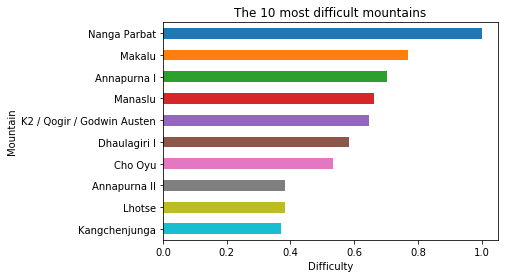

In [35]:
values = df[0:10]['Difficulty'] # choix du set à observer
bar_plot = values.plot.barh() #barre horizontale
colormap = plt.cm.tab10(range(0, len(values)))
bar_plot = values.plot.barh(color=colormap)

# Add titles, labels, invert y-axis
bar_plot.set_title('The 10 most difficult mountains')
bar_plot.set_xlabel('Difficulty')
bar_plot.invert_yaxis()
plt.show()

# 07. Histograms

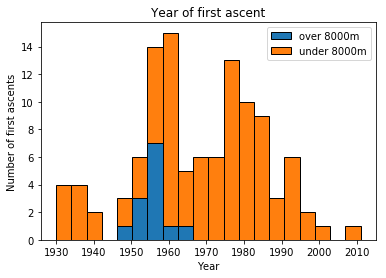

In [65]:
#hist = df['First ascent'].plot.hist(bins=20, color='orange', edgecolor='black')
#hist.set_xlabel('Year')
#hist.set_ylabel('Number of first ascents')
#hist.set_title('Popular years for climbing')

high = df['Height (m)'] > 8000
plt.hist([df.loc[high, 'First ascent'], df.loc[~high, 'First ascent']], stacked=True, edgecolor='black', bins=20)
plt.legend(['over 8000m','under 8000m'], loc='upper right')
plt.xlabel('Year')
plt.ylabel('Number of first ascents')
plt.title('Year of first ascent')
plt.show()

# 08. Scatterplots

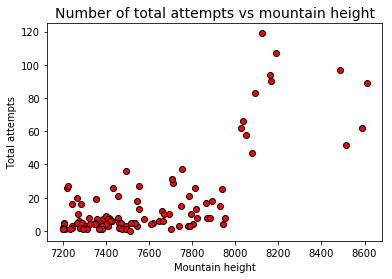

In [67]:
plt.scatter(df['Height (m)'], df['Total attempts'], color='red', edgecolor='black')
plt.ylabel('Total attempts')
plt.xlabel('Mountain height')
plt.title('Number of total attempts vs mountain height', fontsize=14)
plt.show()

# 09. Exercise: filtering by subrange

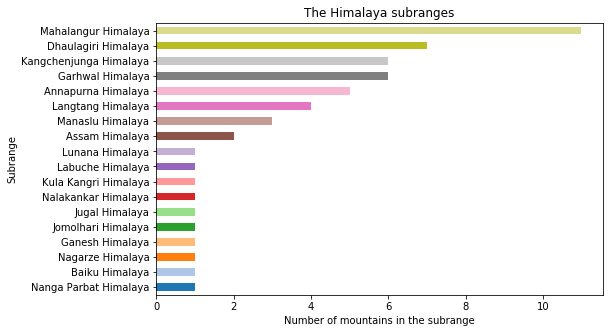

In [82]:
values = df['Range']
#bar_plot = values.plot.barh()
Himalaya = [True if 'Himalaya' in str(x) else False for x in values] #detail de la liste
imalaya = ['Himalaya' in str(x) for x in values]
count = df[Himalaya].groupby('Range').size()
count = count.sort_values()

plt.figure(figsize=(8,5))
colormap = plt.cm.tab20(range(0, len(count)))
plot = count.plot.barh(title='The Himalaya subranges', color=colormap)
plot.set_xlabel('Number of mountains in the subrange')
plot.set_ylabel('Subrange')
plt.show()